In [1]:
import warnings

# ignore specific warning
warnings.simplefilter("ignore", category=UserWarning)

**Copying images to training, validation, and test directories**

In [ ]:
import os
import shutil

# Unzip the train.zip file
!unzip /kaggle/input/dogs-vs-cats/train.zip -d /kaggle/working/dogs-vs-cats/

# Create the base directory for the new dataset
base_dir = '/kaggle/working/cats_and_dogs_small'
os.mkdir(base_dir)

# Create the training, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Create the training set with 1,000 samples of each class
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train/', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train/', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Create the validation set with 500 samples of each class
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train/', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train/', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Create the test set with 500 samples of each class
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train/', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train/', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

**Instantiating a small convnet for dogs vs. cats classification**

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-01-25 11:17:02.666518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 11:17:02.757919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 11:17:02.758777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 11:17:02.761161: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

**Data preprocessing**

Using ImageDataGenerator to read images from directories

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**Fitting the model using a batch generator**

In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator,
                              validation_steps=50)

2023-01-25 11:24:42.391533: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2023-01-25 11:24:44.000454: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 16s 89ms/step - loss: 0.6879 - acc: 0.5390 - val_loss: 0.6799 - val_acc: 0.5470
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6607 - acc: 0.6070 - val_loss: 0.6506 - val_acc: 0.6130
Epoch 3/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6212 - acc: 0.6560 - val_loss: 0.6278 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5751 - acc: 0.6970 - val_loss: 0.5998 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5411 - acc: 0.7310 - val_loss: 0.5764 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5106 - acc: 0.7445 - val_loss: 0.5652 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 8s 84ms/step - loss: 0.4865 - acc: 0.7500 - val_loss: 0.5869 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 9s 88ms/step - loss: 0.45

**Saving the Model**

In [9]:
model.save('cats_and_dogs_small_1.h5')

**Displaying curves of loss and accuracy during training**

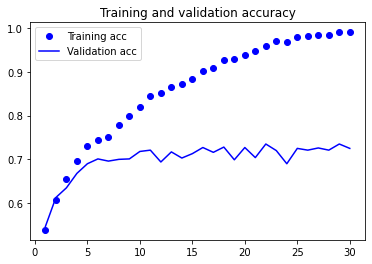

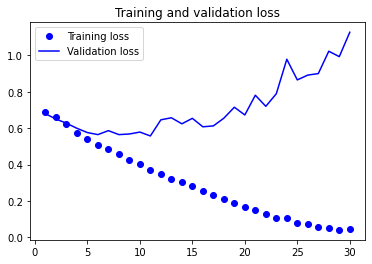

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

**Using data augmentation For Handling OverFitting**

Setting up a data augmentation configuration via ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

Displaying some randomly augmented training images

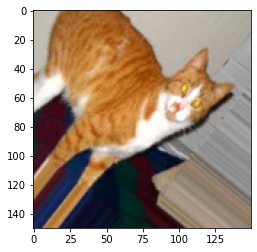

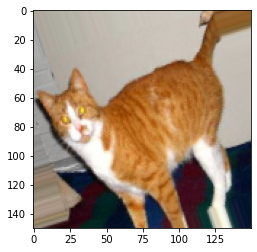

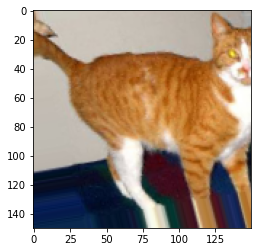

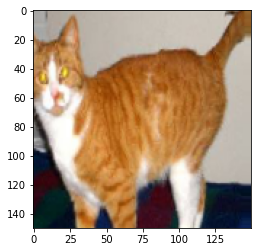

In [12]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

**Defining a new convnet that includes dropout**

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

**Training the convnet using data-augmentation generators**

In [16]:
#verifying GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
tf.config.experimental.set_visible_devices(tf.config.experimental.list_physical_devices('GPU')[0], 'GPU')

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=63, epochs=100, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 15s 239ms/step - loss: 0.4767 - acc: 0.7710
Epoch 2/100
63/63 [==============================] - 14s 226ms/step - loss: 0.4838 - acc: 0.7650
Epoch 3/100
63/63 [==============================] - 15s 239ms/step - loss: 0.4741 - acc: 0.7690
Epoch 4/100
63/63 [==============================] - 14s 226ms/step - loss: 0.4764 - acc: 0.7765
Epoch 5/100
63/63 [==============================] - 15s 235ms/step - loss: 0.4825 - acc: 0.7575
Epoch 6/100
63/63 [==============================] - 15s 230ms/step - loss: 0.4787 - acc: 0.7690
Epoch 7/100
63/63 [==============================] - 15s 240ms/step - loss: 0.4911 - acc: 0.7675
Epoch 8/100
63/63 [==============================] - 14s 229ms/step - loss: 0.4709 - acc: 0.7705
Epoch 9/100
63/63 [==============================] - 15s 239ms/step - loss: 0.4751 - acc: 0.7725
Epoch 10/100
63/63 [=======================

In [23]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)

Validation Loss: 0.39636895060539246
Validation Accuracy: 0.8199999928474426


**Using a pretrained convnet**

Feature extraction

`Instantiating the VGG16 convolutional base`

In [43]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 2s 0us/step


In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

`Extracting features using the pretrained convolutional base`

In [46]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

`Defining and training the densely connected classifier`

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.5961 - acc: 0.6695 - val_loss: 0.4476 - val_acc: 0.8230
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4318 - acc: 0.8070 - val_loss: 0.3753 - val_acc: 0.8440
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3605 - acc: 0.8415 - val_loss: 0.3313 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3259 - acc: 0.8670 - val_loss: 0.3053 - val_acc: 0.8850
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2894 - acc: 0.8840 - val_loss: 0.2879 - val_acc: 0.8860
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2735 - acc: 0.8860 - val_loss: 0.2852 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2602 - acc: 0.8955 - val_loss: 0.2731 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

**Plotting result**

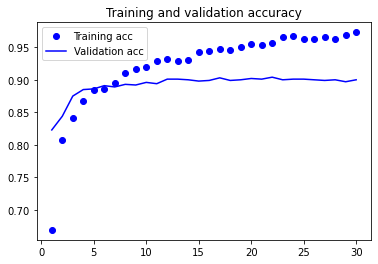

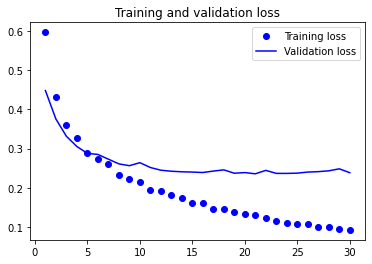

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

we reach a validation accuracy of about 90%—much better than we achieved in the previously with the small model trained from scratch. But the plots also indicate that we’re overfitting almost from the start—despite using dropout with a fairly large rate. That’s because this technique doesn’t use data augmentation, which is essential
for preventing overfitting with small image datasets

**FEATURE EXTRACTION WITH DATA AUGMENTATION**

`Adding a densely connected classifier on top of the convolutional base`

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**Training the model end to end with a frozen convolutional base**

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, 
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 23s 209ms/step - loss: 0.4319 - acc: 0.7860 - val_loss: 0.1708 - val_acc: 0.9310
Epoch 2/30
100/100 [==============================] - 20s 202ms/step - loss: 0.2717 - acc: 0.8855 - val_loss: 0.1705 - val_acc: 0.9380
Epoch 3/30
100/100 [==============================] - 21s 206ms/step - loss: 0.2101 - acc: 0.9205 - val_loss: 0.1296 - val_acc: 0.9460
Epoch 4/30
100/100 [==============================] - 21s 206ms/step - loss: 0.1632 - acc: 0.9315 - val_loss: 0.1329 - val_acc: 0.9540
Epoch 5/30
100/100 [==============================] - 20s 202ms/step - loss: 0.1535 - acc: 0.9360 - val_loss: 0.1090 - val_acc: 0.9620
Epoch 6/30
100/100 [==============================] - 21s 207ms/step - loss: 0.1155 - acc: 0.9500 - val_loss: 0.1112 - val_acc: 0.9610
Epoch 7/30
100/100 [==============================] - 21s 207ms/step - loss: 0.1245 - acc: 0.9550 - val_lo

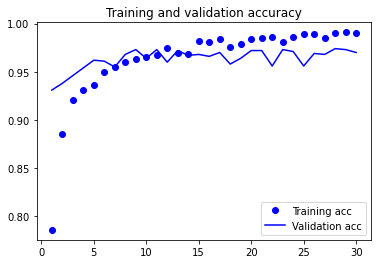

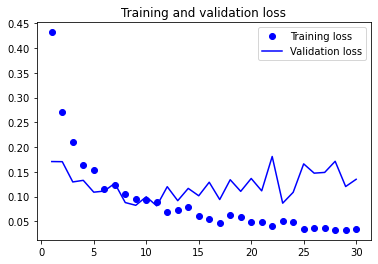

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As we  can see, we reach a validation accuracy of about 96%. This is much better than we achieved with the small
convnet trained from scratch.

**Fine-tuning**

`Freezing all layers up to a specific one`

In [54]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

**Fine-tuning the model**

In [56]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 191ms/step - loss: 0.0159 - acc: 0.9960 - val_loss: 0.1469 - val_acc: 0.9770
Epoch 2/30
100/100 [==============================] - 19s 187ms/step - loss: 0.0075 - acc: 0.9960 - val_loss: 0.1558 - val_acc: 0.9770
Epoch 3/30
100/100 [==============================] - 19s 191ms/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.1663 - val_acc: 0.9730
Epoch 4/30
100/100 [==============================] - 18s 184ms/step - loss: 0.0170 - acc: 0.9955 - val_loss: 0.1382 - val_acc: 0.9740
Epoch 5/30
100/100 [==============================] - 19s 191ms/step - loss: 0.0091 - acc: 0.9980 - val_loss: 0.1810 - val_acc: 0.9730
Epoch 6/30
100/100 [==============================] - 19s 192ms/step - loss: 0.0104 - acc: 0.9965 - val_loss: 0.2274 - val_acc: 0.9640
Epoch 7/30
100/100 [==============================] - 19s 187ms/step - loss: 0.0110 - acc: 0.9970 - val_loss: 0.1491 - val_acc: 0.9760
Epoch 8/30
100/100 [==============================] - 1

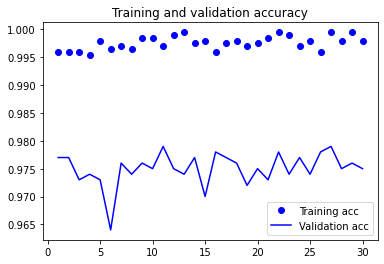

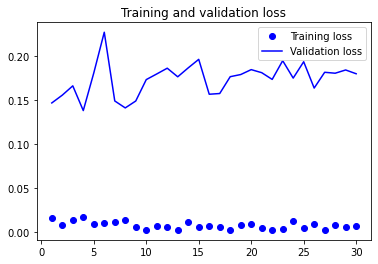

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

accuracy is further imporove to 98%

**Finally evaluting model on test_data**

In [63]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9670000076293945


**Visualizing intermediate activations**

In [65]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/cats_and_dogs_small_1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

`Preprocessing a single image`

In [68]:
img_path = '/kaggle/working/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


`Displaying the test picture`

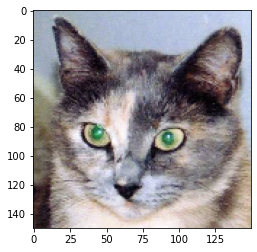

In [69]:
plt.imshow(img_tensor[0])

**Instantiating a model from an input tensor and a list of output tensors**

In [70]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

**Running the model in predict mode**

In [71]:
activations = activation_model.predict(img_tensor)

In [72]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


`Visualizing the fourth channel`

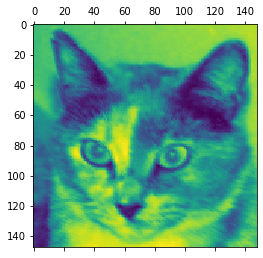

In [73]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

This channel appears to encode a diagonal edge detector. Let’s try the different channel

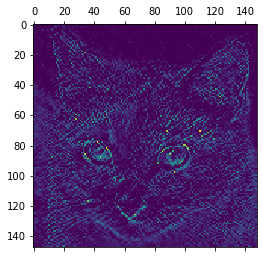

In [85]:
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')

`Visualizing every channel in every intermediate activation`

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  


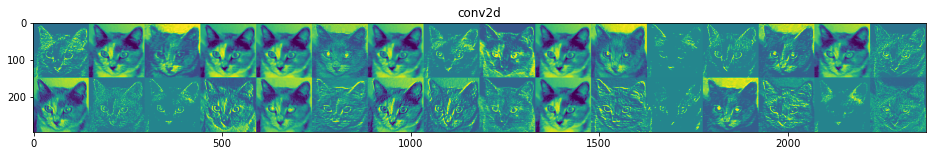

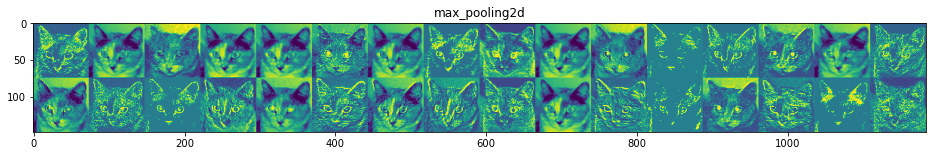

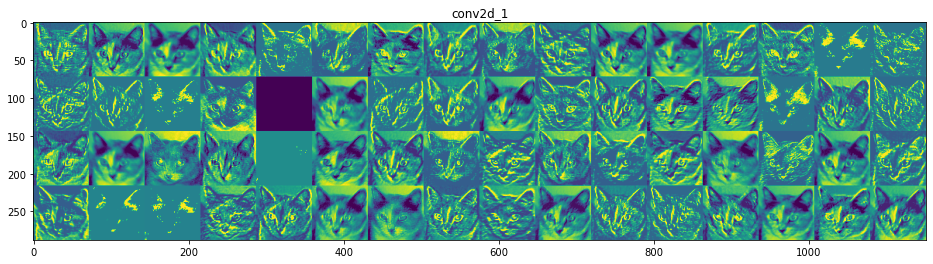

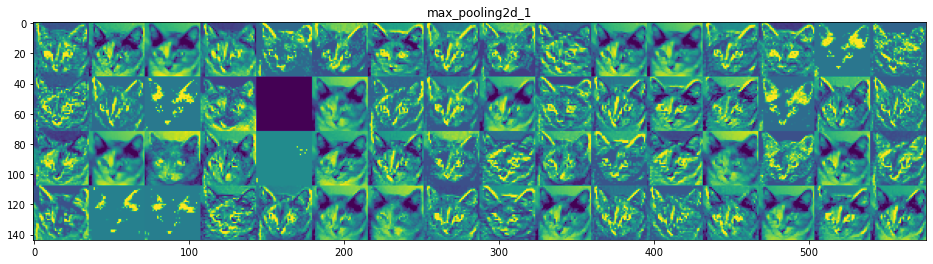

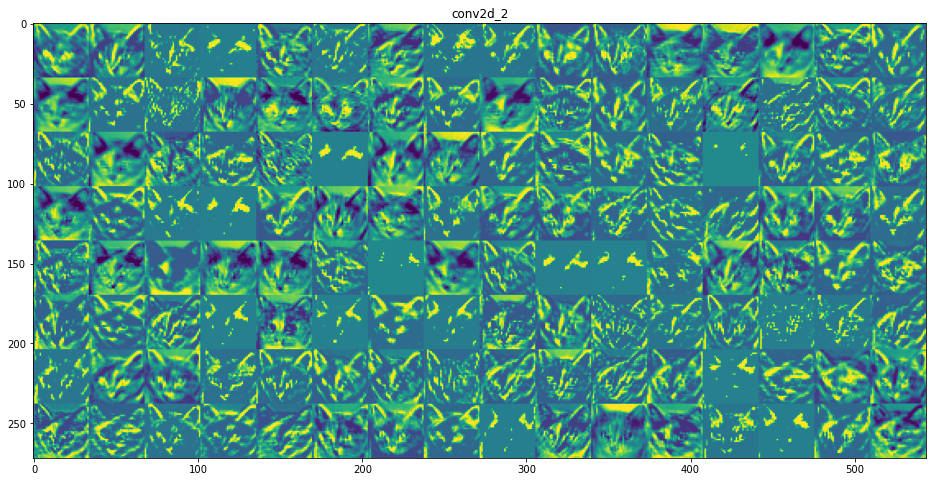

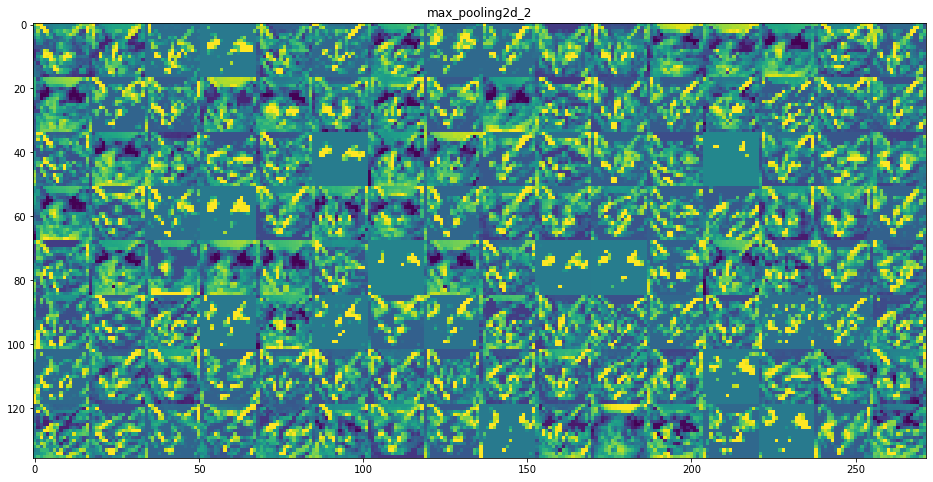

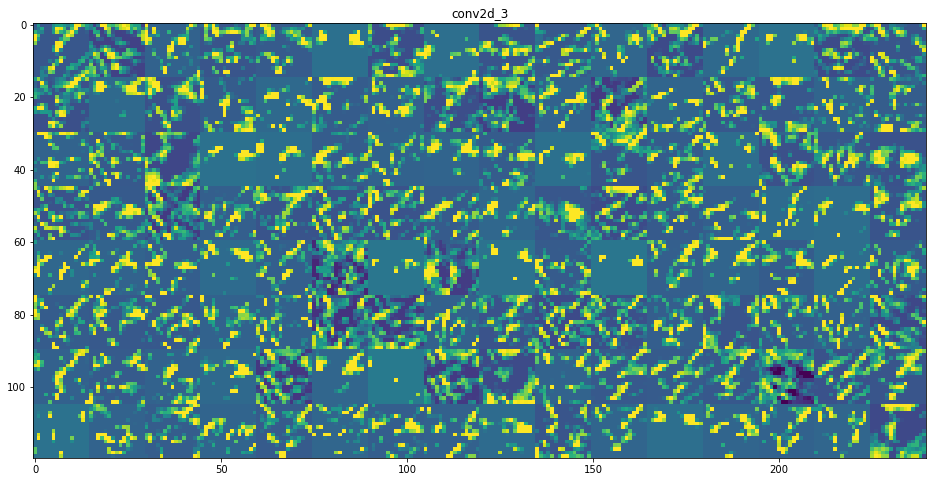

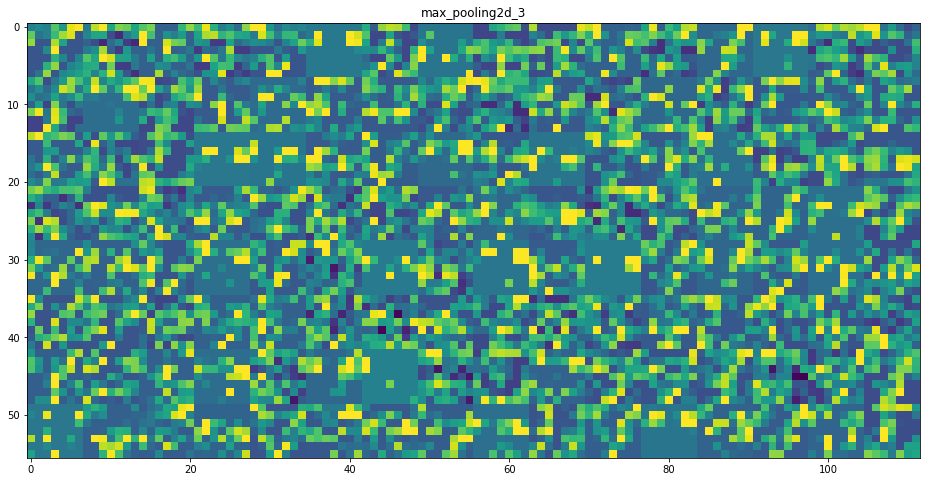

In [88]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                              :, :,
                                              col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

There are a few things to note here:
1 - The first layer acts as a collection of various edge detectors. At that stage, the activations retain almost all of the information present in the initial picture.

2 - As you go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as “cat ear” and “cat eye.” Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the
class of the image.

3 - The sparsity of the activations increases with the depth of the layer: in the first layer, all filters are activated by the input image; but in the following layers, more and more filters are blank. This means the pattern encoded by the filter isn’t found in the input image.